# Test 15: $\chi^2$-test for a population variance

## Objective

- To investigate the difference between a sample variance $s^2$ and an assumed population variance $\sigma^2$

## Assumptions

- It is assumed that the population from which the sample is drawn follows a normal distribution

## Method

- Suppose we have a population with some variance $\sigma^2$

- We take a sample of $n$ observations from this sample, and we get the sample mean and standard deviation as
$$\begin{aligned}
    \bar{x} &= \frac{\sum x_i}{n} \\
    s^2 &= \frac{\sum (x_i - \bar{x})^2}{n-1} \\ 
\end{aligned}$$

- Based on this sample standard deviation $s^2$, we want to draw some conclusion whether the population variance is $\sigma^2$

- Under the null hypothesis, the test statistic $T$ can be computed by
$$\begin{aligned}
    T &= (n-1) \cdot \frac{s^2}{\sigma^2}
\end{aligned}$$

- Under the null hypothesis, $T \sim \chi^2(n-1)$, where $n-1$ is the degrees of freedom

## Example

- Problem
    - A manufacturing process produces a fixed fluid injection into micro-hydraulic systems. 
    - The variability of the volume of injected fluid is critical and is set at $\sigma^2 = 9$ sq ml. 
    - A sample of $n=25$ hydraulic systems yields a sample variance $s^2 = 12$ sq ml. 
    
- Question
    - Has the variability of the volume of fluid injected changed? 

In [20]:
import numpy as np
import scipy

n=25
s_sq = 12
sigma_sq = 9
degrees_of_freedom = n-1

def compute_test_statistic(n, s_sq, sigma_sq):
    return (n-1) * s_sq / sigma_sq

compute_test_statistic(n, s_sq, sigma_sq)
critical_value = scipy.stats.chi2.ppf(0.95, degrees_of_freedom)

## Proof that test statistic is chi square

In [50]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
UNKNOWN_POPULATION_MEAN = 5
UNKNOWN_POPULATION_SD = 2
POPULATION = np.random.normal(UNKNOWN_POPULATION_MEAN, UNKNOWN_POPULATION_SD, 10_000)

SAMPLE_SIZE=100
HYPOTHESIZED_POPULATION_SD = 2

def get_test_statistic():
    sample = np.random.choice(POPULATION, SAMPLE_SIZE)

    sample_mean = np.sum(sample)/SAMPLE_SIZE
    sample_sd = (np.sum((sample - sample_mean)**2) / (SAMPLE_SIZE-1))**0.5
    t = (SAMPLE_SIZE - 1) * (sample_sd/HYPOTHESIZED_POPULATION_SD)**2
    return t

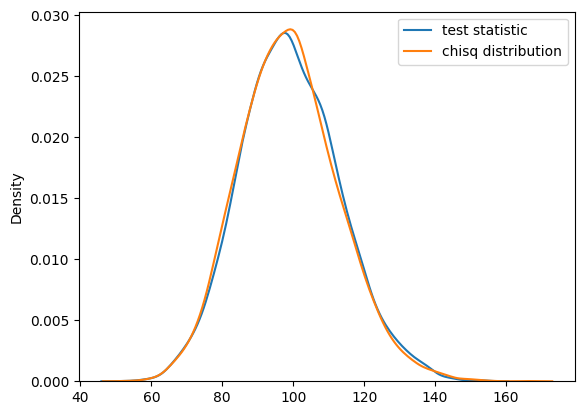

In [56]:
test_statistic_distribution = np.array([get_test_statistic() for _ in range(10_000)])
true_chisq_distribution = np.random.chisquare(SAMPLE_SIZE-1, 10_000)
sns.kdeplot(test_statistic_distribution, label='test statistic')
sns.kdeplot(true_chisq_distribution, label='chisq distribution')
plt.legend()